In [4]:
import cospar as cs

In [5]:
cs.logging.print_version()

# Set the messaging level. At a given value, a running function will
# print information at or below its level.
cs.settings.verbosity=2 #range: 0 (error),1 (warning),2 (info),3 (hint).

# Plot setting. If you want to control a particular plot,
# just change the setting here, and run that plotting function.
cs.settings.set_figure_params(format='png',figsize=[4,3.5],dpi=75,fontsize=14,pointsize=3)

Running cospar 0.1.8 (python 3.8.8) on 2021-07-25 10:17.


In [6]:
# set the directory for figures and data. If not existed yet, they will be created automtaically.
cs.settings.data_path='data_cospar'
cs.settings.figure_path='fig_cospar'
cs.hf.set_up_folders()

In [7]:
adata_orig_0=cs.datasets.hematopoiesis_subsampled()


In [8]:
# This is just a name to indicate this data for saving results. Can be arbitrary but should be unique to this data.
data_des='blood'

X_state=adata_orig_0.X # np.array or sparse matrix, shape (n_cell, n_gene)
gene_names=adata_orig_0.var_names # List of gene names, shape (n_genes,)

# Clonal data matrix, np.array or sparse matrix, shape: (n_cell, n_clone)
X_clone=adata_orig_0.obsm['X_clone']

# 2-d embedding, np.array, shape: (n_cell, 2)
X_emb=adata_orig_0.obsm['X_emb']

# A vector of cluster id for each cell, np.array, shape: (n_cell,),
state_info=adata_orig_0.obs['state_info']

# principle component matrix, np.array, shape: (n_cell, n_pcs)
X_pca=adata_orig_0.obsm['X_pca']

# A vector of time info, np.array of string, shape: (n_cell,)
time_info=adata_orig_0.obs['time_info']

In [9]:
adata_orig=cs.pp.initialize_adata_object(X_state=X_state,gene_names=gene_names,
    time_info=time_info,X_clone=X_clone,data_des=data_des)

Create new anndata object
Time points with clonal info: ['2' '4' '6']


In [10]:
adata_orig=cs.pp.initialize_adata_object(adata=adata_orig_0,X_clone=X_clone)


Time points with clonal info: ['2' '4' '6']


In [11]:
cs.hf.update_time_ordering(adata_orig,updated_ordering=['2','4','6'])


In [12]:
adata_orig


AnnData object with n_obs × n_vars = 7438 × 25289
    obs: 'time_info', 'state_info', 'n_counts'
    var: 'highly_variable', 'highly_variable_old'
    uns: 'clonal_time_points', 'data_des', 'neighbors', 'state_info_colors', 'time_ordering', 'umap'
    obsm: 'X_clone', 'X_emb', 'X_emb_old', 'X_pca', 'X_pca_old', 'X_umap'
    obsp: 'connectivities', 'distances'

Finding highly variable genes...


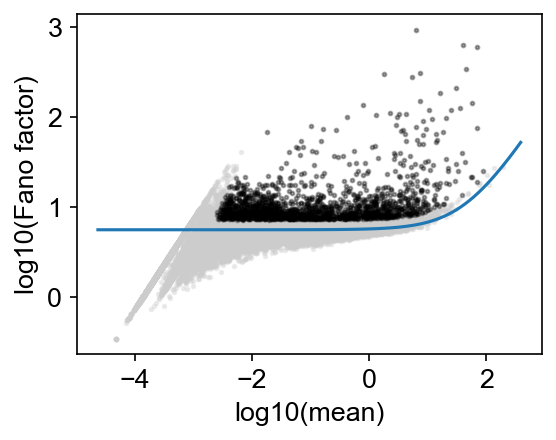

Keeping 1615 genes


In [13]:
cs.pp.get_highly_variable_genes(adata_orig,normalized_counts_per_cell=10000,min_counts=3,
        min_cells=3, min_gene_vscore_pctl=90)

adata.var['highly_variable'] not updated.
Please choose corr_threshold properly, and set confirm_change=True


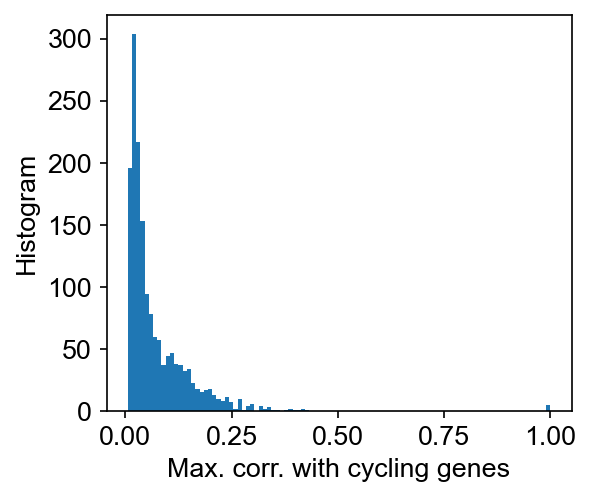

In [14]:
cs.pp.remove_cell_cycle_correlated_genes(adata_orig,cycling_gene_list=['Ube2c','Hmgb2', 'Hmgn2', 'Tuba1b', 'Ccnb1', 'Tubb5', 'Top2a','Tubb4b'])


In [15]:
cs.pp.remove_cell_cycle_correlated_genes(adata_orig,corr_threshold=0.2,confirm_change=True)


Number of selected non-cycling highly variable genes: 1508
Remove 107 cell cycle correlated genes.
adata.var['highly_variable'] updated


In [16]:
update=True
if update:
    cs.pp.get_X_pca(adata_orig,n_pca_comp=40)
    cs.pp.get_X_emb(adata_orig,n_neighbors=20,umap_min_dist=0.3) #Do not run this, as we want to keep the original embedding
    #cs.pp.get_state_info(adata_orig,n_neighbors=20,resolution=0.5) # Do not run this, as we want to keep the original state annotation.

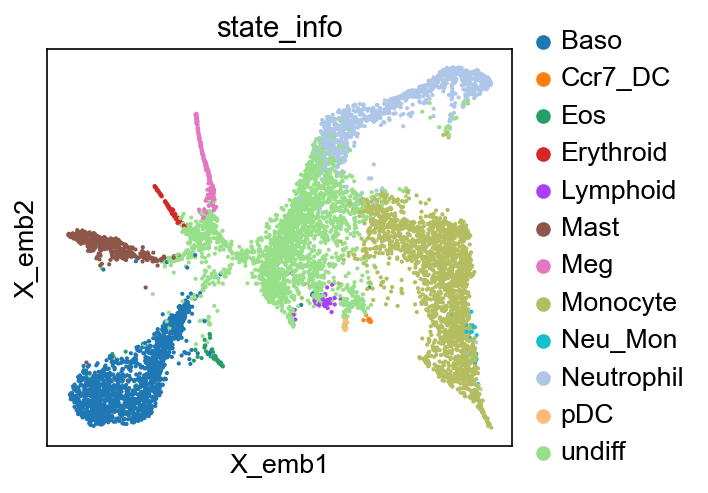

<Figure size 300x262.5 with 0 Axes>

In [17]:
cs.pl.embedding(adata_orig,color='state_info')


In [18]:
adata_orig


AnnData object with n_obs × n_vars = 7438 × 25289
    obs: 'time_info', 'state_info', 'n_counts'
    var: 'highly_variable', 'highly_variable_old'
    uns: 'clonal_time_points', 'data_des', 'neighbors', 'state_info_colors', 'time_ordering', 'umap'
    obsm: 'X_clone', 'X_emb', 'X_emb_old', 'X_pca', 'X_pca_old', 'X_umap'
    obsp: 'connectivities', 'distances'

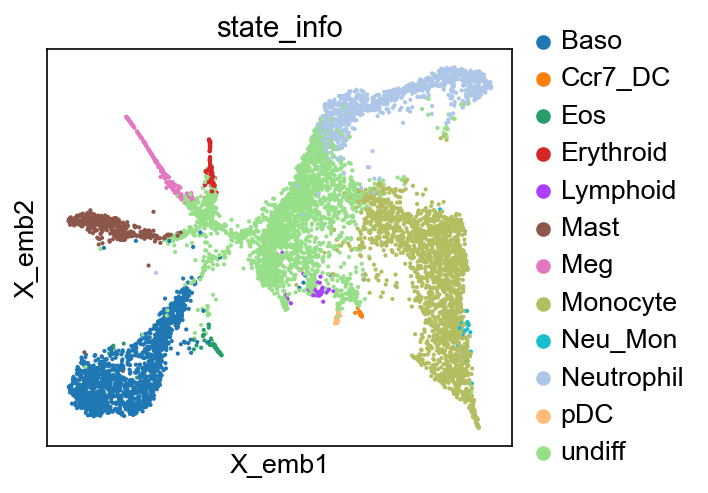

<Figure size 300x262.5 with 0 Axes>

In [19]:
adata_orig.obsm['X_emb']=adata_orig.obsm['X_emb_old']
adata_orig.obsm['X_pca']=adata_orig.obsm['X_pca_old']
cs.pl.embedding(adata_orig,color='state_info')

In [20]:
cs.hf.check_available_choices(adata_orig)


Available transition maps: []
Available clusters: ['Mast', 'Ccr7_DC', 'Monocyte', 'Meg', 'pDC', 'Lymphoid', 'undiff', 'Erythroid', 'Baso', 'Neu_Mon', 'Neutrophil', 'Eos']
Available time points: ['2' '4' '6']
Clonal time points: ['2' '4' '6']


In [21]:
save=True
if save:
    cs.hf.save_preprocessed_adata(adata_orig)

Saved file: data_cospar/LARRY_sp500_ranking1_adata_preprocessed.h5ad


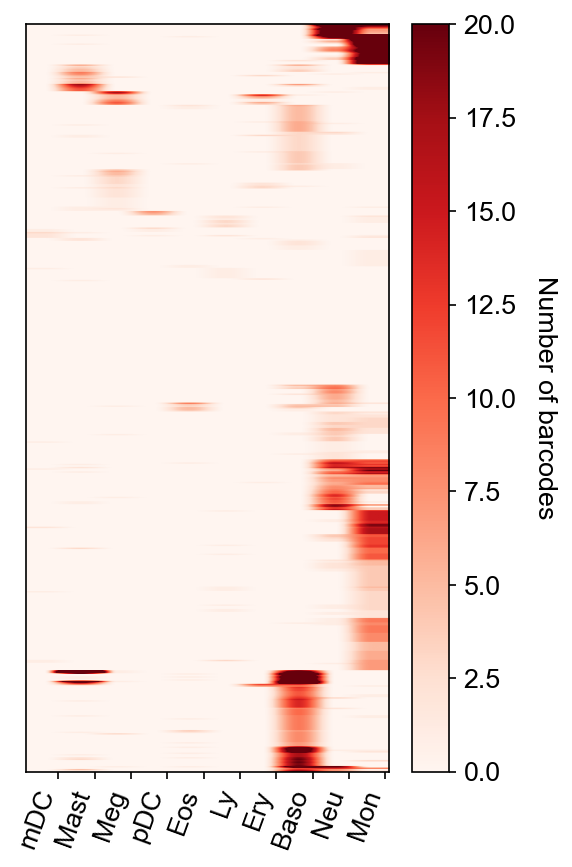

In [22]:
selected_times=None
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
cs.pl.barcode_heatmap(adata_orig,selected_times=selected_times, selected_fates=selected_fates,
        color_bar=True,rename_fates=celltype_names,log_transform=False)

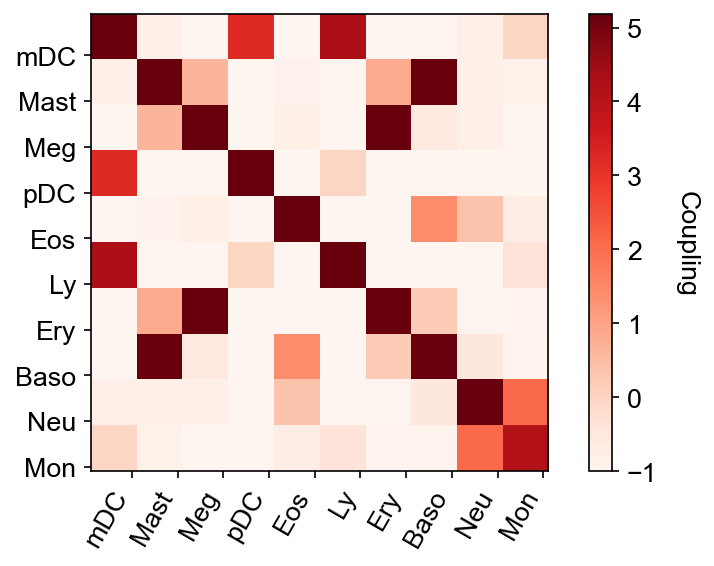

In [23]:
selected_times=None
coupling=cs.pl.fate_coupling_from_clones(adata_orig,selected_times=selected_times, selected_fates=selected_fates,
                                color_bar=True,rename_fates=celltype_names,method='Weinreb')


            /-Lymphoid
         /-|
        |   \-Ccr7_DC
      /-|
     |  |   /-Monocyte
     |   \-|
     |      \-Neutrophil
   /-|
  |  |         /-Baso
  |  |      /-|
  |  |   /-|   \-Mast
  |  |  |  |
--|   \-|   \-Eos
  |     |
  |     |   /-Erythroid
  |      \-|
  |         \-Meg
  |
   \-pDC


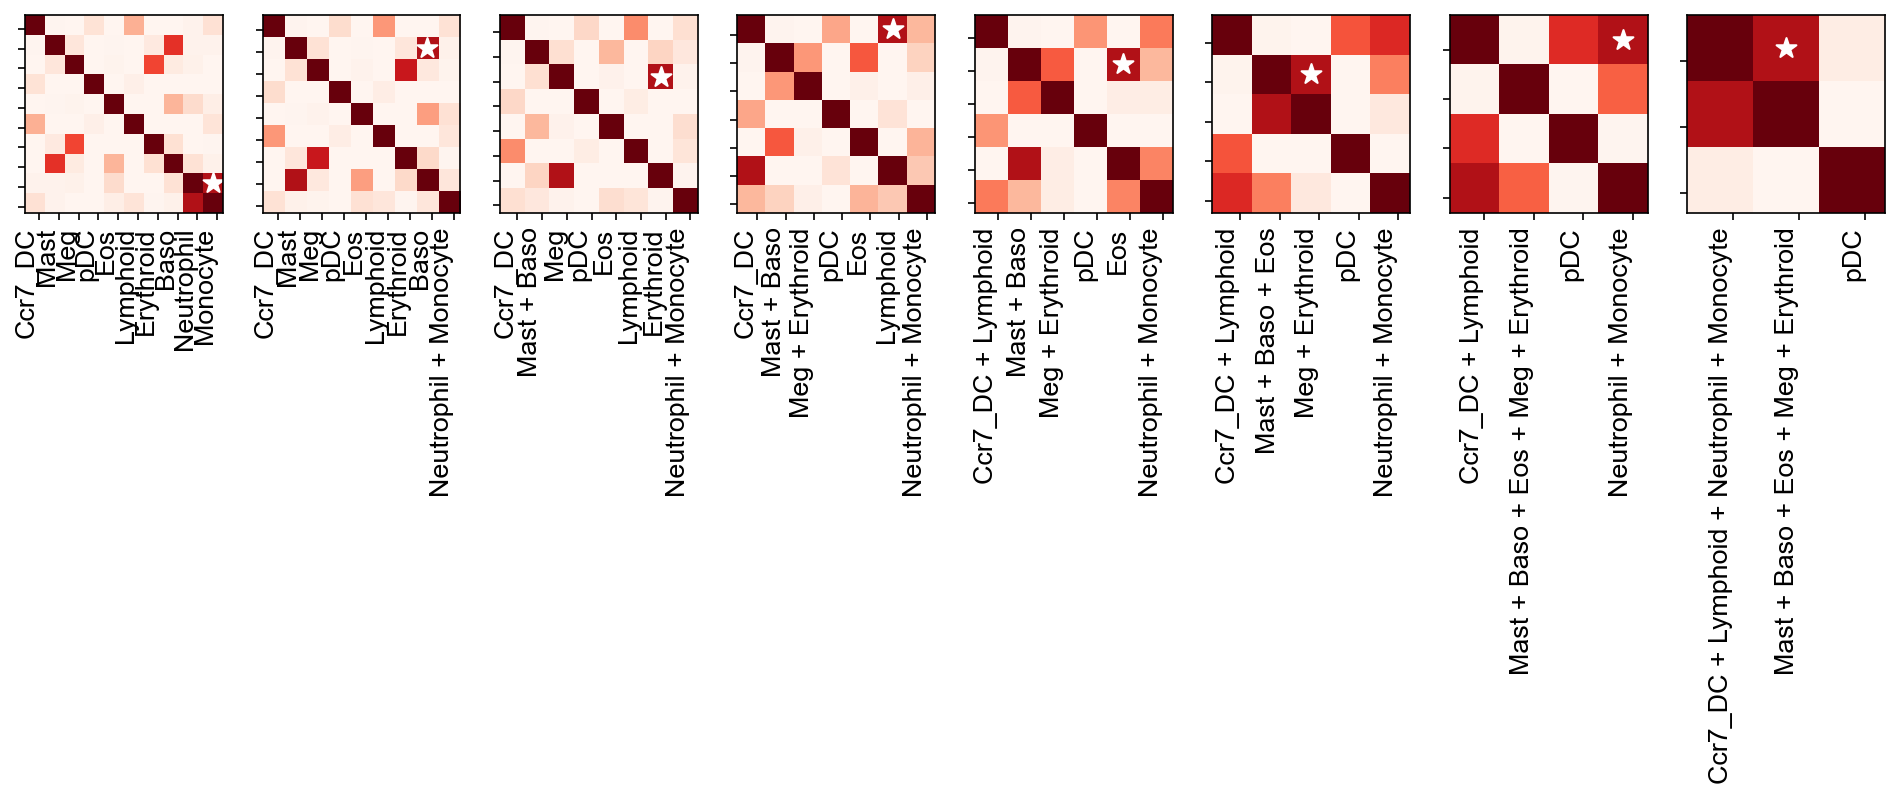

In [24]:
cs.pl.fate_hierarchy_from_clones(adata_orig,selected_times=selected_times,selected_fates=selected_fates,plot_history=True)


Current clone id: 0
Current clone id: 50
Current clone id: 100
Current clone id: 150
Current clone id: 200
Current clone id: 250
Current clone id: 300
Current clone id: 350
Current clone id: 400
Current clone id: 450


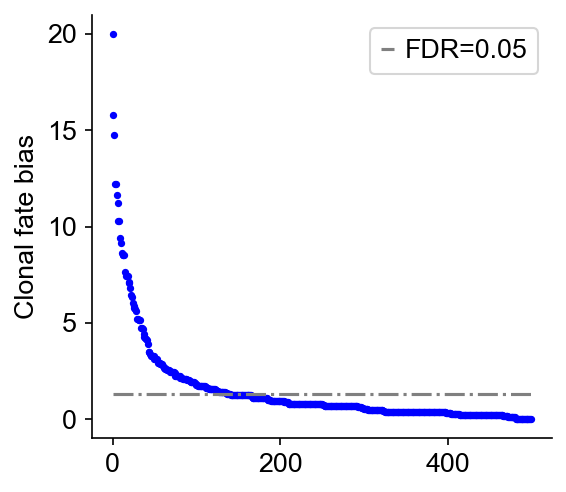

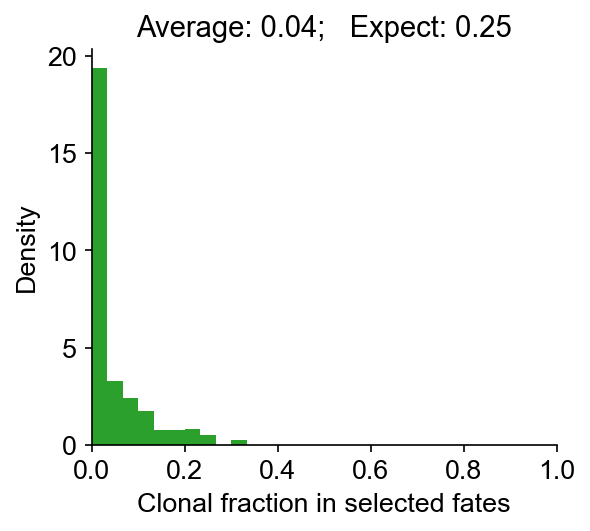

In [25]:
result=cs.pl.clonal_fate_bias(adata_orig,selected_fate='Monocyte',alternative='two-sided')


In [26]:
result


,Clone ID,Clone size,Q_value,Fate bias
0,488,58,1.037416e-20,19.984047
1,387,37,1.608291e-16,15.793635
2,227,45,1.665465e-15,14.778465
3,162,42,6.210001e-13,12.206908
4,302,112,6.210001e-13,12.206908
...,...,...,...,...
495,366,9,1.000000e+00,-0.000000
496,46,18,1.000000e+00,-0.000000
497,408,27,1.000000e+00,-0.000000
498,6,4,1.000000e+00,-0.000000


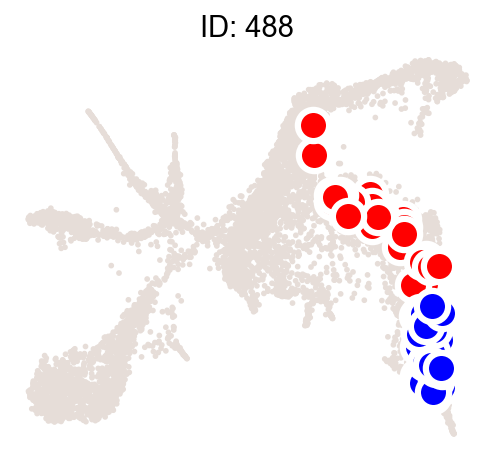

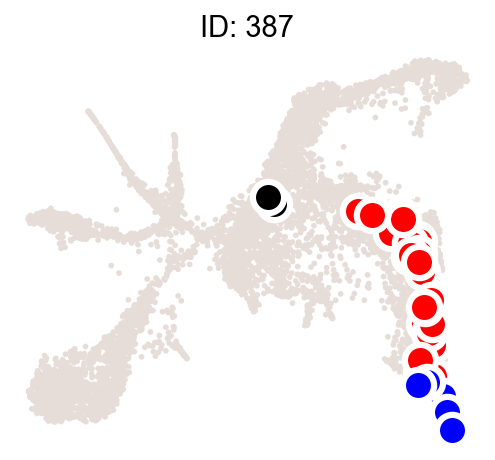

In [27]:
ids=result['Clone ID'][:2]
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=ids,color_list=['black','red','blue'],clone_point_size=10)

In [28]:
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,clonal_time_points=['2','4'],
                    later_time_point='6',smooth_array=[20,15,10,5],
          sparsity_threshold=0.1,intraclone_threshold=0.2,max_iter_N=10,epsilon_converge=0.01)

Trying to set attribute `.uns` of view, copying.


------Compute the full Similarity matrix if necessary------
------Infer transition map between initial time points and the later time one------
--------Current initial time point: 2--------
Step 1: Select time points
Number of multi-time clones post selection: 185
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.943
Iteration 5, Use smooth_round=5
Convergence (CoSpar, iter_N=5): corr(previous_T, current_T)=0.996
--------Current initial time point: 4--------
Step 1: Select time points
Number of multi-time clones post selection: 500
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar,

In [29]:
cs.hf.check_available_map(adata)
adata.uns['available_map']

['transition_map', 'intraclone_transition_map']

In [30]:
adata_1=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points=['4'],
        later_time_point='6',initialize_method='OT',OT_cost='GED',
                smooth_array=[20,15,10,5],sparsity_threshold=0.1)


Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 4--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use OT method for initialization-------
Load pre-computed custom OT matrix
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.964
Convergence (JointOpt, iter_N=1): corr(previous_T, current_T)=0.263
-----JointOpt Iteration 2: Infer initial clonal structure
-----JointOpt Iteration 2: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Itera

In [31]:
cs.hf.check_available_map(adata_1)
adata_1.uns['available_map']

['transition_map', 'OT_transition_map']

In [32]:
adata_2=cs.tmap.infer_Tmap_from_state_info_alone(adata_orig,initial_time_points=['4'],
        later_time_point='6',initialize_method='HighVar',HighVar_gene_pctl=85,max_iter_N=[10,10],
    epsilon_converge=[0.01,0.01],smooth_array=[20,15,10,5],sparsity_threshold=0.1)

Step I: Generate pseudo clones where each cell has a unique barcode-----


Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


Step II: Perform joint optimization-----
--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 4--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use the HighVar method for initialization-------
Step a: find the commonly shared highly variable genes------
Highly varable gene number: 2136 (t1); 2245 (t2). Common set: 978
Step b: convert the shared highly variable genes into clonal info------
Total used genes=851 (no cells left)
Step c: compute the transition map based on clonal info from highly variable genes------
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.965
Iteration 5, Use smooth_round=5
Convergence (CoSpar, iter_N=5): corr(previous_T, current_T)=0.992
Finishing initialization using HighVar, used time 56.7939918

In [37]:
cs.hf.check_available_map(adata_2)
adata_2.uns['available_map']

['transition_map', 'HighVar_transition_map']

In [34]:
# We use the Weinreb method, which selects uni-potent clones based on a pre-defined list of fates.
selected_fates=['Baso', 'Ccr7_DC', 'Eos', 'Erythroid', 'Lymphoid', 'Mast', 'Meg', 'Monocyte', 'Neu_Mon', 'Neutrophil', 'pDC']

adata_3=cs.tmap.infer_Tmap_from_clonal_info_alone(adata_orig,method='weinreb',later_time_point='6',selected_fates=selected_fates)

Trying to set attribute `.uns` of view, copying.


Infer transition map between initial time points and the later time point.
--------Current initial time point: 2--------
Number of multi-time clones post selection: 185
Use only uni-potent clones (weinreb et al., 2020)
Used uni-potent clone fraction 0.6162162162162163
--------Current initial time point: 4--------
Number of multi-time clones post selection: 500
Use only uni-potent clones (weinreb et al., 2020)
Used uni-potent clone fraction 0.538


In [35]:
cs.hf.check_available_map(adata_3)
adata_3.uns['available_map']

['clonal_transition_map']

In [36]:
save_data=False
if save_data:
    cs.hf.save_map(adata)

load_data=False
if load_data:
    file_path='data_cospar/LARRY_sp500_ranking1_MultiTimeClone_Later_FullSpace0_t*2*4*6_adata_with_transition_map.h5ad'
    adata=cs.hf.read(file_path)

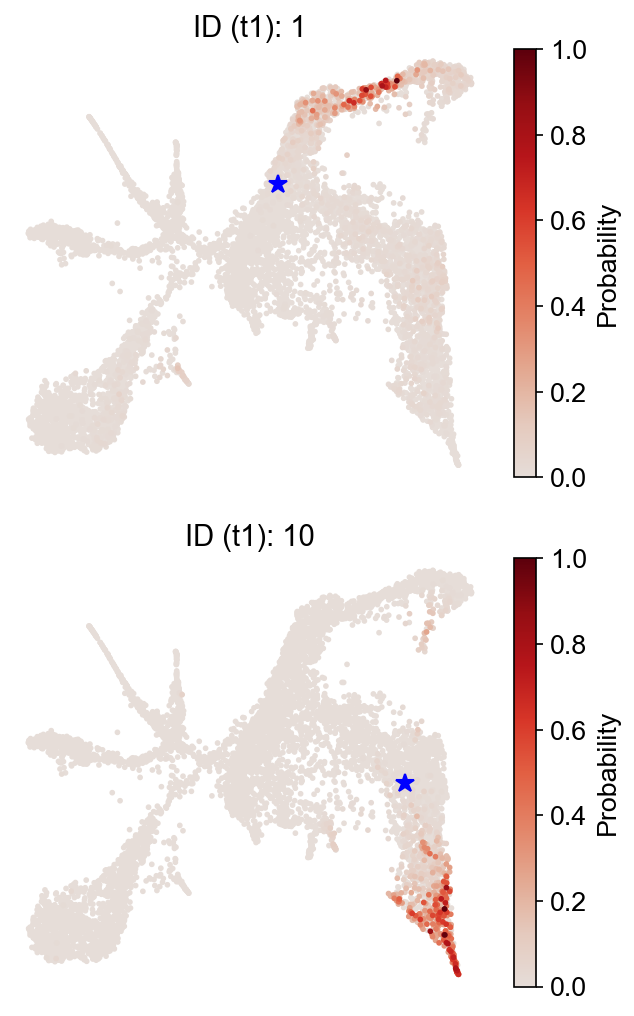

In [37]:
selected_state_id_list=[1,10] # This is a relative ID. Its mapping to the actual cell id depends on map_backward.

map_backward=False
cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list,
                used_Tmap='transition_map',map_backward=map_backward)

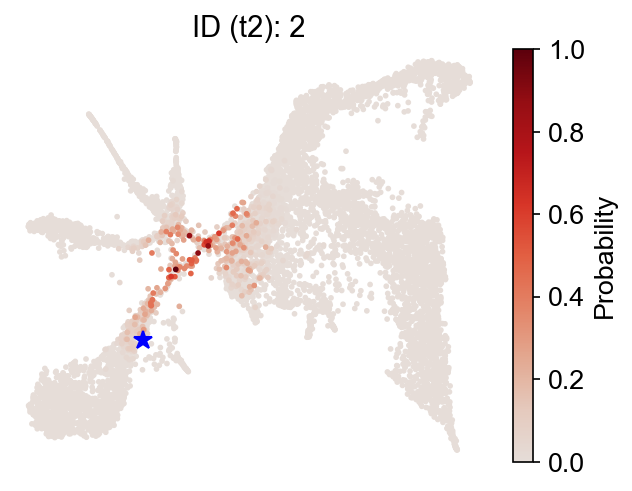

In [38]:
selected_state_id_list=[2]
map_backward=True
cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list,
                    used_Tmap='transition_map',map_backward=map_backward)

/Users/advait/opt/anaconda3/lib/python3.8/site-packages/cospar/plotting/_plotting.py:412: RuntimeWarning: invalid value encountered in true_divide
  prob_vec=prob_vec/np.max(prob_vec)


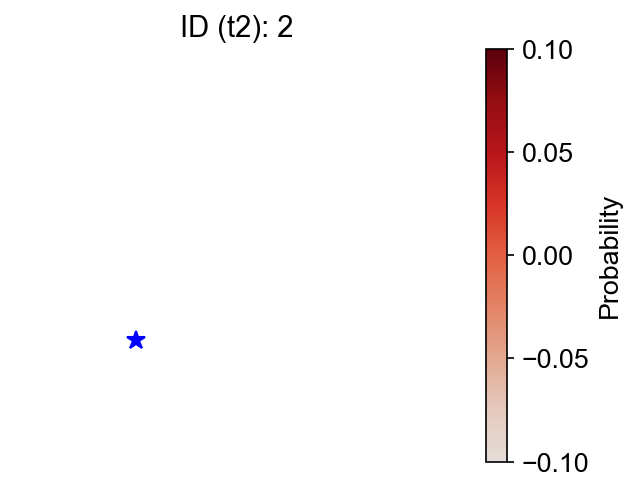

In [39]:
selected_state_id_list=[2]
map_backward=True
cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list,
                                    used_Tmap='intraclone_transition_map',map_backward=map_backward)


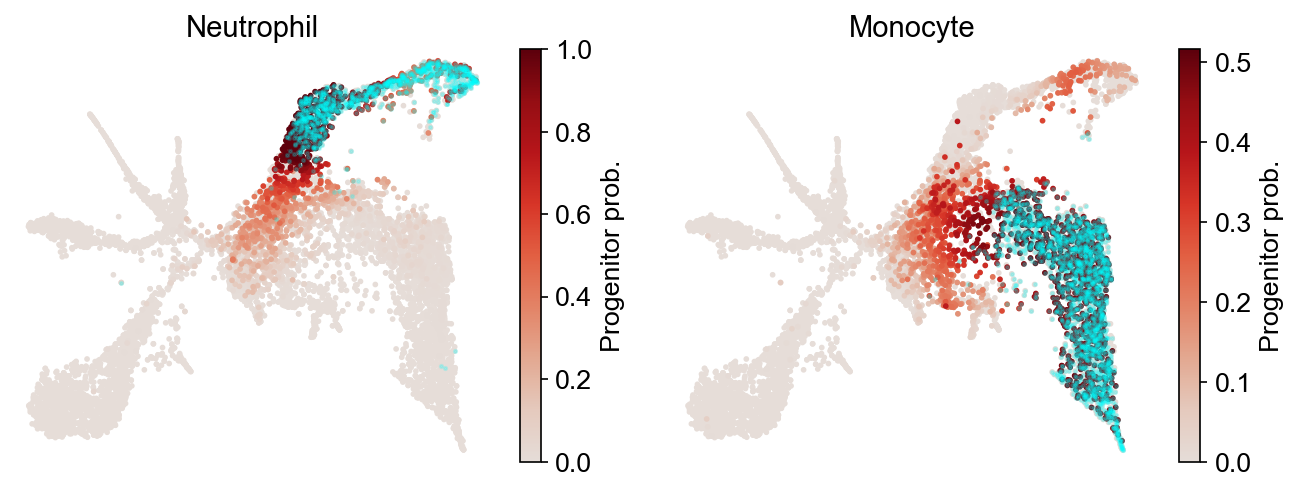

In [40]:
cs.pl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],
               used_Tmap='transition_map',map_backward=True,plot_target_state=True,horizontal=True)


In [41]:
print(adata.obs)

     time_info  state_info      n_counts
0            6  Neutrophil  10000.000977
1            6    Monocyte   9999.999023
2            6        Baso  10000.000000
3            6    Monocyte  10000.000000
4            6    Monocyte  10000.000000
...        ...         ...           ...
7433         6        Baso   9999.999023
7434         6      undiff  10000.000000
7435         6  Neutrophil   9999.999023
7436         6  Neutrophil   9999.999023
7437         6  Neutrophil  10000.000000

[7438 rows x 3 columns]


In [57]:
# All lines of code above are part of the tutorial's code.
# They're there to set up adata and other variables.
# Everything below this is my own code.

In [53]:
def _preflight_check(adata, coordinate_space):
    """"""
    assert coordinate_space in adata.obsm_keys(), "Please choose from {}".format(adata.obsm_keys())

In [87]:
def plot_subset(adata, state, color, coordinate_space, alpha=0.2, xlabel="", ylabel="", title="", show_edges=True):
    """
    Function for plotting a subset of cells from AnnData (adata).
    Parameters:
    -----------
    adata [required]
        AnnData object. Documentation: https://anndata.readthedocs.io/en/latest/
    state [required]
        state_info in adata (e.g. Neutrophil, Monocyte, Baso, or undiff)
    color [required]
        The graph color (e.g. yellow, green, red, blue)
    coordinate_space [required]
        The choice of embedding. Should be found in adata.obsm_keys()
    xlabel
        The x-axis label, left blank by default.
    ylabel
        The y-axis label, left blank by default.
    title
        The title of the graph, left blank by default.
    show_edges
        Determines if the thin line "edges" around the graph are shown, true by default.
    """
    _preflight_check(adata, coordinate_space)
    emb = adata.obsm[coordinate_space]
    df = adata.obs
    cell_index = df.loc[df['state_info'] == state].index.astype(int)
    for subset_index in cell_index:
        x_emb, y_emb = emb[subset_index]
        plt.scatter(x_emb, y_emb, c=color, alpha=alpha)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        if not show_edges:
            plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
            plt.box(False)
            # These lines hide the edges and ticks.

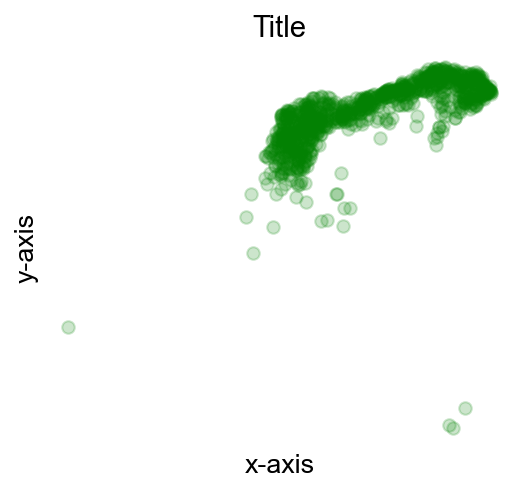

In [88]:
plot_subset(adata, 'Neutrophil', 'green', 'X_emb', 0.2, 'x-axis', 'y-axis', 'Title', False)